# Study of the scale of the contextualized embeddings

Yao Fu, University of Edinburgh\
yao.fu@ed.ac.uk\
Fri Jun 18 2021

In [1]:
import torch 
import codecs

import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm 
from data_utils import News20Data
from transformers import BertModel, AdamW, get_constant_schedule_with_warmup

In [20]:
%load_ext autoreload
%autoreload 2

In [2]:
dataset = News20Data(batch_size=20)

Processing dataset ...
Reading data ...
... 0 seconds
Tokenizing and sorting train data ...
... 61 seconds
Tokenizing and sorting dev data ...
... 20 seconds
Tokenizing and sorting test data ...
... 19 seconds


In [3]:
bert = BertModel.from_pretrained('bert-base-uncased')

In [4]:
dev_loader = dataset.val_dataloader()

In [21]:
word_freq = torch.zeros(30522)
word_emb = torch.zeros(30522, 768)

In [22]:
with torch.no_grad():
    # for bi, batch in tqdm(enumerate(dev_loader)):
    for batch in tqdm(dev_loader):
        # if(bi == 100): break
        emb = bert(batch['input_ids'], batch['attention_mask'])[0]
        for x, x_emb in zip(batch['input_ids'], emb):
            for xi, xie in zip(x, x_emb):
                word_freq[xi] += 1
                word_emb[xi] += xie

100%|██████████| 2613/2613 [37:26<00:00,  1.16it/s]


In [23]:
word_emb_norm = word_emb / (word_freq + 1).view(30522, 1)
word_emb_norm = (word_emb_norm * word_emb_norm).sum(-1)

In [42]:
x = []
y = []
for w, we in zip(word_freq, word_emb_norm):
    if(w > 0 and w < 1500): 
        x.append(w)
        y.append(we)

In [43]:
x = np.array(x)
y = np.array(y)

In [44]:
y.shape

(20629,)

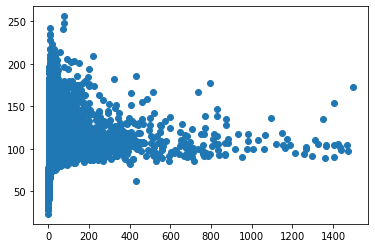

In [45]:
plt.scatter(x, y)

**Conclusion: word scale irrelevant to frequency**

In [20]:
(x > 0).sum()

6557

In [19]:
y

array([58.85555,  0.     ,  0.     , ...,  0.     ,  0.     ,  0.     ],
      dtype=float32)